In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data)

In [2]:
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
# Urban Data
urban_df = pyber_df.loc[pyber_df["type"] == "Urban", :]
urban_average_fare = round(urban_df.groupby(['type','city'])['fare'].mean(),2)
urban_ride_count = urban_df.groupby(['type','city'])['ride_id'].count()
urban_driver_count = urban_df.groupby(['type','city'])['driver_count'].mean()
urban_summary = pd.DataFrame({"Fare": urban_average_fare,
                                "Ride Count": urban_ride_count,
                              "Driver Count": urban_driver_count
                            })
urban_summary.head(50)

Fare  Ride Count  Driver Count
type  city                                                
Urban Amandaburgh          24.64          18            12
      Barajasview          25.33          22            26
      Carriemouth          28.31          27            52
      Christopherfurt      24.50          27            41
      Deanville            25.84          19            49
      East Kaylahaven      23.76          29            65
      Erikaland            24.91          12            37
      Grahamburgh          25.22          25            61
      Huntermouth          28.99          24            37
      Hurleymouth          25.89          28            36
      Jerryton             25.65          25            64
      Johnton              26.79          21            27
      Joneschester         22.29          25            39
      Justinberg           23.69          30            39
      Karenberg            26.34          17            22
      Karenside            27.45          28             5
      Lake Danielberg      24.84          26            19
      Lake Jonathanshire   23.43          24             5
      Lake Scottton        23.81          24            58
      Leahton              21.24          21            17
      Liumouth             26.15          33            69
      Loganberg            25.29          28            23
      Martinezhaven        22.65          24            25
      New Jacobville       26.77          18            50
      New Kimberlyborough  22.59          30            33
      New Paulton          27.82          19            44
      New Paulville        21.68          22            44
      North Barbara        23.49          22            18
      North Jasmine        25.21          30            33
      North Jason          22.74          35             6
      North Madeline       22.62          25            19
      North Markport       27.50          14            22
      Pattyland            23.98          21            59
      Port Angela          23.84          19            67
      Port David           25.85          22             7
      Port Frank           27.20          33            23
      Port Johnbury        23.01          22             3
      Port Samanthamouth   25.64          25            57
      Raymondhaven         21.48          25            11
      Reynoldsfurt         21.92          19            67
      Richardfort          22.37          28            38
      Roberthaven          23.73          24            47
      Robertport           23.06          20            12
      Rodneyfort           28.62          23            34
      Rogerston            22.10          22            25
      Royland              20.57          30            64
      Simpsonburgh         23.36          24            21
      South Evanton        26.73          31            11
      South Jack           22.97          19            46
      South Karenland      26.54          38             4

In [4]:
# Suburban Data
suburban_df = pyber_df.loc[pyber_df["type"] == "Suburban", :]
suburban_average_fare = round(suburban_df.groupby(['type','city'])['fare'].mean(),2)
suburban_ride_count = suburban_df.groupby(['type','city'])['ride_id'].count()
suburban_driver_count = suburban_df.groupby(['type','city'])['driver_count'].mean()

suburban_summary = pd.DataFrame({"Fare": suburban_average_fare,
                                 "Ride Count": suburban_ride_count,
                                 "Driver Count": suburban_driver_count
                                 })
suburban_summary.head(50)   

Fare  Ride Count  Driver Count
type     city                                               
Suburban Barronchester       36.42          16            11
         Bethanyland         32.96          18            22
         Brandonfort         35.44          19            10
         Colemanland         30.89          22            23
         Davidfurt           32.00          17            23
         East Aaronbury      25.66           9             7
         East Danielview     31.56          17            22
         East Kentstad       29.82          13            20
         East Marymouth      30.84          27             5
         Grayville           27.76          15             2
         Josephside          32.86          27            25
         Lake Ann            30.89          12             3
         Lake Omar           28.07          14            22
         Lake Robertside     31.26          25             4
         Lake Scott          31.89          18            23
         Lewishaven          25.24          12            23
         Lewisland           34.61          17             4
         Mezachester         30.76          17            14
         Myersshire          30.20          16            19
         New Olivia          34.05          17            20
         New Raymond         27.96          22            17
         New Shannonberg     28.38          17            20
         Nicolechester       30.91          19            19
         North Jeffrey       29.24          13            11
         North Richardhaven  24.70          14             1
         North Timothy       31.26          15             7
         Port Shane          31.08          19             7
         Rodriguezview       30.75          15            20
         Sotoville           31.98          11            10
         South Brenda        33.96          24             1
         South Teresa        31.22          22            21
         Veronicaberg        32.83          17            20
         Victoriaport        27.78          14            16
         West Hannah         29.55          21            12
         West Kimmouth       29.87          20             4
         Williamsonville     31.87          14             2

In [5]:
# Rural Data
rural_df = pyber_df.loc[pyber_df["type"] == "Rural", :]
rural_average_fare = round(rural_df.groupby(['type','city'])['fare'].mean(),2)
rural_ride_count = rural_df.groupby(['type','city'])['ride_id'].count()
rural_driver_count = rural_df.groupby(['type','city'])['driver_count'].mean()

rural_summary = pd.DataFrame({"Fare": rural_average_fare,
                               "Ride Count": rural_ride_count,
                                 "Driver Count": rural_driver_count
                                })
rural_summary.head(20)

Fare  Ride Count  Driver Count
type  city                                              
Rural Bradshawfurt       40.06          10             7
      Garzaport          24.12           3             7
      Harringtonfort     33.47           6             4
      Jessicaport        36.01           6             1
      Lake Jamie         34.36           6             4
      Lake Latoyabury    26.06          11             2
      Michaelberg        35.00          12             6
      New Ryantown       43.28           6             2
      Newtonview         36.75           4             1
      North Holly        29.13           9             8
      North Jaime        30.80           8             1
      Penaborough        35.25           5             6
      Randallchester     29.74           5             9
      South Jennifer     35.26           7             7
      South Marychester  41.87           8             1
      South Saramouth    36.16           4             7
      Taylorhaven        42.26           6             1
      West Heather       33.89           9             4

## Bubble Plot of Ride Sharing Data

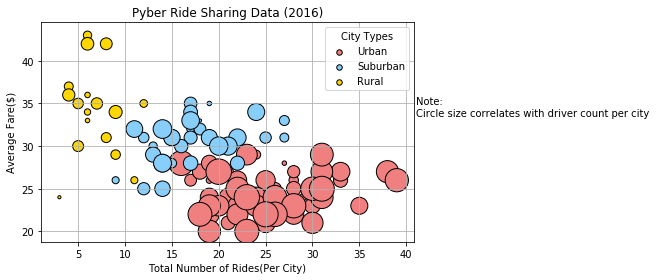

<Figure size 432x288 with 0 Axes>

In [6]:
# Obtain the x and y coordinates for each of the three city types
# x is total number of rides
# y is average fare
urban_x_axis = urban_ride_count
urban_y_axis = round(urban_average_fare,0)
urban_bubble_size = (np.arange(len(urban_driver_count)))*10

suburban_x_axis = suburban_ride_count
suburban_y_axis = round(suburban_average_fare,0)
suburban_bubble_size = (np.arange(len(suburban_driver_count)))*10


rural_x_axis = rural_ride_count
rural_y_axis = round(rural_average_fare,0)
rural_bubble_size = (np.arange(len(rural_driver_count)))*10

# Build the scatter plots for each city types
urban_scatter_plot = plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors="lightcoral",
                                 label="Urban", edgecolors="black", s=urban_bubble_size, alpha=.9999)

suburban_scatter_plot = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors="lightskyblue",
                                    label="Suburban", edgecolors="black", s=suburban_bubble_size, alpha=.9999)

rural_scatter_plot = plt.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors="gold", 
                                 label="Rural", edgecolors="black", s=rural_bubble_size, alpha=.9999)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Create a legend
lgnd=plt.legend(title="City Types", loc="best")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
text_str = "Note: \n Circle size correlates with driver count per city"
plt.text(41,33.5, text_str, fontsize=10,wrap=True)

plt.grid(which='major')

# Show plot
plt.tight_layout()
plt.show()

# Save Figure
plt.savefig("data/pyber_scatter_plot.png")

## Total Fares by City Type

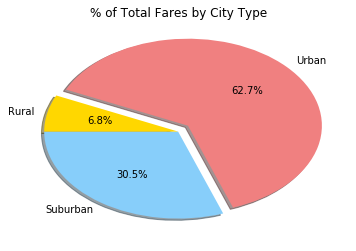

<Figure size 432x288 with 0 Axes>

In [7]:
# Calculate Type Percent
suburban_fares = suburban_df.groupby('type')['fare'].sum()
urban_fares = urban_df.groupby('type')['fare'].sum()
rural_fares = rural_df.groupby('type')['fare'].sum()
total_fares = suburban_fares + urban_fares + rural_fares

#suburban percent
suburban_fares_percent = round((suburban_fares/total_fares)*100,1)

#urban percent
urban_fares_percent = round((urban_fares/total_fares)*100,1)

# rural percent
rural_fares_percent = round((rural_fares/total_fares)*100,1)

# Build Pie Chart
labels = ["Suburban", "Urban", "Rural"]
sizes = [suburban_fares, urban_fares, rural_fares]
colors = ["lightskyblue","lightcoral","gold"]
explode = (0, .1, 0)
plt.title("% of Total Fares by City Type")

# Show Figure
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

plt.show()

# Save Figure
plt.savefig("data/pyber_fares_by_city_pie.png")

## Total Rides by City Type

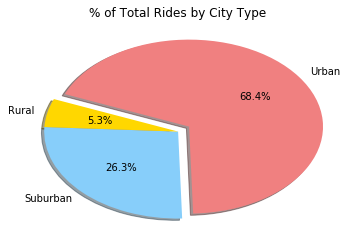

<Figure size 432x288 with 0 Axes>

In [8]:
# Calculate Ride Percents
suburban_rides = suburban_df.groupby('type')['fare'].count()
urban_rides = urban_df.groupby('type')['fare'].count()
rural_rides = rural_df.groupby('type')['fare'].count()

total_rides = suburban_rides + urban_rides + rural_rides

#suburban percent
suburban_rides_percent = round((suburban_rides/total_rides)*100,1)
#urban percent
urban_rides_percent = round((urban_rides/total_rides)*100,1)

# rural percent
rural_rides_percent = round((rural_rides/total_rides)*100,1)

# Build Pie Chart
labels = ["Suburban", "Urban", "Rural"]
sizes = [suburban_rides, urban_rides, rural_rides]
colors = ["lightskyblue","lightcoral","gold"]
explode = (0, .1, 0)
plt.title("% of Total Rides by City Type")

# Show Figure
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=177)

plt.show()

# Save Figure
plt.savefig("data/pyber_rides_by_city_pie.png") 

## Total Drivers by City Type

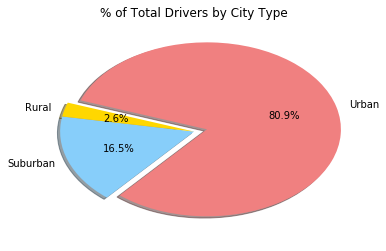

<Figure size 432x288 with 0 Axes>

In [9]:
# Calculate Driver 
urban_drivers = urban_summary['Driver Count'].sum()
rural_drivers = rural_summary['Driver Count'].sum()
suburban_drivers = suburban_summary['Driver Count'].sum()
total_drivers = urban_drivers + rural_drivers + suburban_drivers

#suburban percent
suburban_drivers_percent = round((suburban_drivers/total_drivers)*100,1)

#urban percent
urban_drivers_percent = round((urban_drivers/total_drivers)*100,1)

# rural percent
rural_drivers_percent = round((rural_drivers/total_drivers)*100,1)

# Build Pie Chart
labels = ["Suburban", "Urban", "Rural"]
sizes = [suburban_drivers, urban_drivers, rural_drivers]
colors = ["lightskyblue","lightcoral","gold"]
explode = (0, .1, 0)
plt.title("% of Total Drivers by City Type")

# Show Figure
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)

plt.show()

# Save Figure
plt.savefig("data/pyber_drivers_by_city_type_pie.png")